## Learning goals

After completing these exercises, you will know how to
- Take more derivatives of simple products between vectors and matrices
- Implement Ridge regression using the analytical expressions
- Scale data appropriately for linear regression
- Evaluate a model across two different hyperparameters

## Exercise 1 - Choice of model and degrees of freedom

**a)** How many degrees of freedom does an OLS model fit to the features $x, x^2, x^3$ and the intercept have?

**b)** Why is it bad for a model to have too many degrees of freedom?

**c)** Why is it bad for a model to have too few degrees of freedom?

**d)** Read [chapter 3.4.1 of Hastie et al.'s book](https://link.springer.com/book/10.1007/978-0-387-84858-7). What is the expression for the effective degrees of freedom of the ridge regression fit?

**e)** Why might we want to use Ridge regression instead of OLS?

**f)** Why migth we want to use OLS instead of Ridge regression?

**Answers:**\
**1a)**

For an OLS model with features $1, x, x^2 \text{ and } x^3$ we have four degrees of freedom, one for each feature including the intercept.


**1b)**

If a model has too many degrees of freedom we might experience overfitting, as seen in the materials and exercises for week 35.


**1c)** 

If a model has too few degrees of freedom it might not be able to propperly model the feature we are attempting to predict.


**1d)**

From Hastie et al. equation 3.50 we have the expression for the effective degrees of freedom for the ridge regression given as:

$$
df(\lambda) = tr(H_{\lambda}) = \sum^p_{j = 1} \frac{d^2_j}{d^2_j + \lambda}
$$


**1e)**

In cases where OLS would give us a singular matrix, e.g. when the matrix $X^T X$ is non-invertible, we could use Ridge regression instead, to make the matrix invertible.

**1f)** 

Ridge regression introduces some bias through $\lambda$, when we want unbiased estimates for $\theta$ we might use OLS instead of Ridge regression.

## Exercise 2 - Deriving the expression for Ridge Regression

The aim here is to derive the expression for the optimal parameters using Ridge regression.

The expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, was given by the optimization problem

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

By minimizing the above equation with respect to the parameters $\boldsymbol{\beta}$ we could then obtain an analytical expression for the parameters $\boldsymbol{\hat\beta_{OLS}}$.

We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem. (One can require as part of the optimization problem that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is a finite number larger than zero. We will not implement that in this course.)

### a) Expression for Ridge regression

Show that the optimal parameters

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix.

The ordinary least squares result is

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

**Answers:**\
**2a)**



## Exercise 3 - Scaling data

In [410]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Setting seed to get the same data every time
np.random.seed(1016)

In [411]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

**a)** Adapt your function from last week to only include the intercept column if the boolean argument `intercept` is set to true.

In [412]:
def polynomial_features(x, p, intercept=False):
    n = len(x)

    # Only include the intercept column if the itnercept argumenSt is True
    if intercept:
        X = np.zeros((n, p + 1))

        for i in range(p + 1):
            X[:, i] = x**i

    else:
        X = np.zeros((n, p))

        for i in range(1, p + 1):
            X[:, i - 1] = x**i
    
    return X

In [413]:
# Testing function
print(polynomial_features(x, 2, intercept=False).shape)
print(polynomial_features(x, 2, intercept=True).shape)

(100, 2)
(100, 3)


**b)** Split your data into training and test data(80/20 split)

In [414]:
X = polynomial_features(x, 3, intercept=False)

In [415]:
# Splitting data into training and testing data, 80/20 training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
x_train = X_train[:, 0] # These are used for plotting
x_test = X_test[:, 0] # These are used for plotting

**c)** Scale your design matrix with the sklearn standard scaler, though based on the mean and standard deviation of the training data only.

In [416]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)
y_offset = np.mean(y_train)

## Exercise 4 - Implementing Ridge Regression

**a)** Implement a function for computing the optimal Ridge parameters using the expression from **2a)**.

In [417]:
def Ridge_parameters(X, y, L):
    # Assumes X is scaled and has no intercept column
    return np.linalg.pinv(X.T @ X + L * np.eye(X.shape[1])) @ X.T @ y

beta = Ridge_parameters(X_train_s, y_train, 1)
print(beta)

[ 0.70633676 -0.14375763 -0.3129167 ]


**b)** Fit a model to the data, and plot the prediction using both the training and test x-values extracted before scaling, and the y_offset.

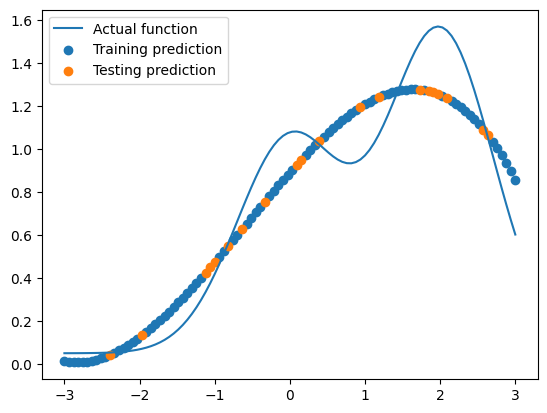

In [418]:
plt.plot(x, y, label="Actual function")

plt.scatter(x_train, X_train_s @ beta + y_offset, label="Training prediction")
plt.scatter(x_test, X_test_s @ beta + y_offset, label="Testing prediction")
plt.legend()

## Exercise 4 - Testing multiple hyperparameters

**a)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5 with lambda set to 0.01. Plot the MSE as a function of polynomial degree.

**b)** Compute the MSE of your ridge model for a polynomial with degree 3, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of lambda.

**c)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of polynomial degree and lambda using a [heatmap](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html).

In [435]:
# Setting seed to get the same data every time
np.random.seed(22)

# Generate the data
n = 50
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, n)  # Fixed: added n

# Split the data before creating the design matrices
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

**4A)**

Degree 1: Train MSE = 0.521399, Test MSE = 0.538138
Degree 2: Train MSE = 0.500242, Test MSE = 0.444893
Degree 3: Train MSE = 0.478936, Test MSE = 0.443541
Degree 4: Train MSE = 0.478137, Test MSE = 0.447050
Degree 5: Train MSE = 0.465606, Test MSE = 0.453275


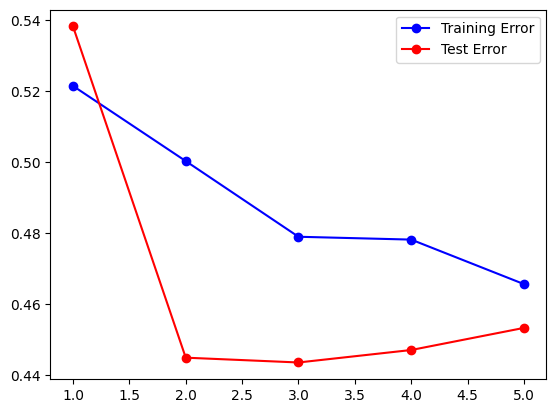

In [436]:
from sklearn.metrics import mean_squared_error
from numpy import log

degrees = range(1, 6)
Lambda = 0.01
MSE_train_degrees = []
MSE_test_degrees = []

# Iterating over all degrees
for degree in degrees:   
    
    # Create a design matrix for current polynomial degree using raw x values
    X_train = polynomial_features(x_train, degree)  # Use x_train, not X_train_s
    X_test = polynomial_features(x_test, degree)    # Use x_test, not X_test_s

    # Scaling data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the model (find optimal parameters)
    beta = Ridge_parameters(X_train_scaled, y_train, Lambda)
    
    # Make predictions
    y_train_pred = X_train_scaled @ beta
    y_test_pred = X_test_scaled @ beta
    
    # Calculate MSE for both training and test data
    train_mse_current = mean_squared_error(y_train, y_train_pred)
    test_mse_current = mean_squared_error(y_test, y_test_pred)
    
    # Store results
    MSE_train_degrees.append(train_mse_current)
    MSE_test_degrees.append(test_mse_current)
    
    # Print results
    print(f"Degree {degree}: Train MSE = {train_mse_current:.6f}, Test MSE = {test_mse_current:.6f}")

plt.plot(degrees, MSE_train_degrees, 'o-', color='blue', label='Training Error')
plt.plot(degrees, MSE_test_degrees, 'o-', color='red', label='Test Error')
plt.legend()

**4b)**

Lambda 1.00e+03: Train MSE = 0.502662, Test MSE = 0.574062
Lambda 1.29e+02: Train MSE = 0.422403, Test MSE = 0.521871
Lambda 1.67e+01: Train MSE = 0.372441, Test MSE = 0.467613
Lambda 2.15e+00: Train MSE = 0.353846, Test MSE = 0.438510
Lambda 2.78e-01: Train MSE = 0.352903, Test MSE = 0.434893
Lambda 3.59e-02: Train MSE = 0.352884, Test MSE = 0.434487
Lambda 4.64e-03: Train MSE = 0.352884, Test MSE = 0.434436
Lambda 5.99e-04: Train MSE = 0.352884, Test MSE = 0.434429
Lambda 7.74e-05: Train MSE = 0.352884, Test MSE = 0.434428
Lambda 1.00e-05: Train MSE = 0.352884, Test MSE = 0.434428


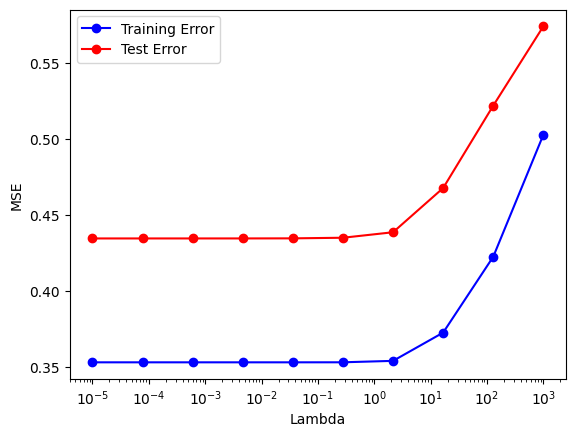

In [437]:

degree = 3
Lambda = np.logspace(3, -5, 10)
MSE_train_lambda = []
MSE_test_lambda = []

# Create design matrices once since degree is fixed
X_train = polynomial_features(x_train, degree)
X_test = polynomial_features(x_test, degree)

# Iterating over all lambda values
for L in Lambda:   
   
   # Train the model (find optimal parameters)
   beta = Ridge_parameters(X_train, y_train, L)
   
   # Make predictions
   y_train_pred = X_train @ beta
   y_test_pred = X_test @ beta
   
   # Calculate MSE for both training and test data
   train_mse_current = mean_squared_error(y_train, y_train_pred)
   test_mse_current = mean_squared_error(y_test, y_test_pred)
   
   # Store results
   MSE_train_lambda.append(train_mse_current)
   MSE_test_lambda.append(test_mse_current)
   
   # Print results
   print(f"Lambda {L:.2e}: Train MSE = {train_mse_current:.6f}, Test MSE = {test_mse_current:.6f}")

plt.semilogx(Lambda, MSE_train_lambda, 'o-', color='blue', label='Training Error')
plt.semilogx(Lambda, MSE_test_lambda, 'o-', color='red', label='Test Error')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.legend()

**4c)**

In [438]:
# Define ranges
degrees = range(1, 6)
Lambdas = np.logspace(-1, -5, 5)

MSE_heatmap_train = np.zeros((5, 5))
MSE_heatmap_test = np.zeros((5, 5))

# Nested loop structure
for degree in degrees:
    for j, L in enumerate(Lambdas):
        
        # Create design matrices for current degree
        X_train_poly = polynomial_features(x_train, degree, intercept=False)
        X_test_poly = polynomial_features(x_test, degree, intercept=False)
        
        # Scale the design matrices
        scaler = StandardScaler()
        X_train_s = scaler.fit_transform(X_train_poly)
        X_test_s = scaler.transform(X_test_poly)
        
        # Train Ridge regression
        beta = Ridge_parameters(X_train_s, y_train, L)
        
        # Make predictions
        y_train_pred = X_train_s @ beta
        y_test_pred = X_test_s @ beta
        
        # Calculate MSE and store in 5x5 matrix
        MSE_heatmap_train[degree - 1, j] = mean_squared_error(y_train, y_train_pred)
        MSE_heatmap_test[degree - 1, j] = mean_squared_error(y_test, y_test_pred)


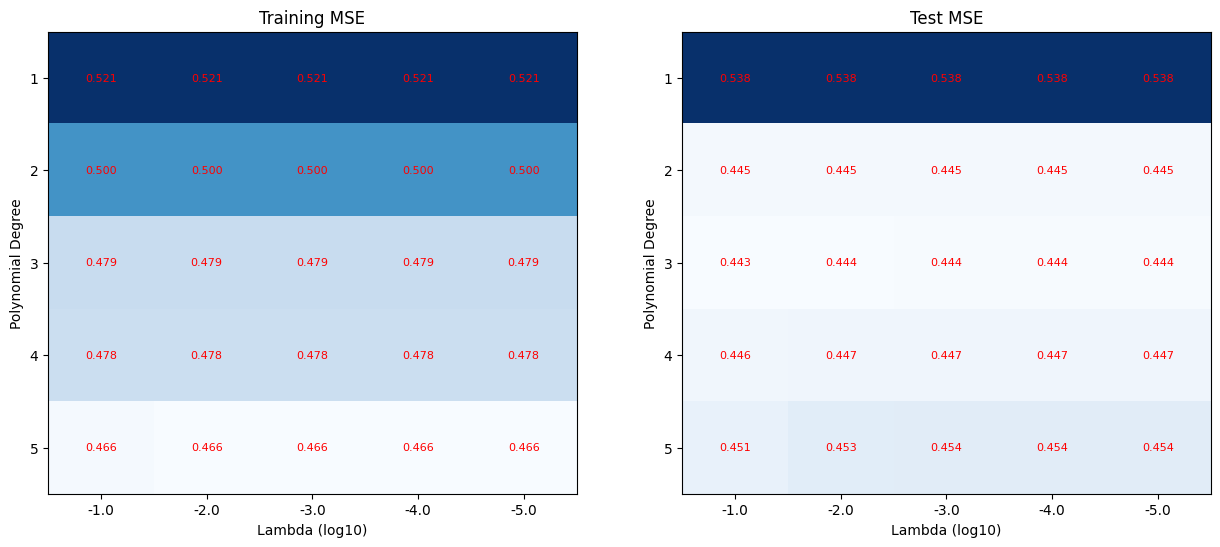

In [440]:
# Create the heatmap
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training MSE heatmap
im1 = ax1.imshow(MSE_heatmap_train, cmap='Blues', aspect='auto')
ax1.set_yticks(range(len(degrees)), labels=list(degrees))
ax1.set_xticks(range(len(Lambdas)), labels=[f"{np.log10(lam):.1f}" for lam in Lambdas])
ax1.set_xlabel("Lambda (log10)")
ax1.set_ylabel("Polynomial Degree")
ax1.set_title("Training MSE")

# Add values to training heatmap
for i in range(len(degrees)):
    for j in range(len(Lambdas)):
        ax1.text(j, i, f'{MSE_heatmap_train[i, j]:.3f}',
                ha="center", va="center", color="red", fontsize=8)

# Test MSE heatmap
im2 = ax2.imshow(MSE_heatmap_test, cmap='Blues', aspect='auto')
ax2.set_yticks(range(len(degrees)), labels=list(degrees))
ax2.set_xticks(range(len(Lambdas)), labels=[f"{np.log10(lam):.1f}" for lam in Lambdas])
ax2.set_xlabel("Lambda (log10)")
ax2.set_ylabel("Polynomial Degree")
ax2.set_title("Test MSE")

# Add values to test heatmap
for i in range(len(degrees)):
    for j in range(len(Lambdas)):
        ax2.text(j, i, f'{MSE_heatmap_test[i, j]:.3f}',
                ha="center", va="center", color="red", fontsize=8)

plt.show()